![banner](../banner.jpg)

***[Workshop 6](about) - Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Module 4 - AnoPrimer - Primer Design in *Anopheles gambiae*

**Theme: Tools & technology**

In the previous modules of workshop 6, we learnt how to discover candidate loci for insecticide resistance, using genome-wide selection scans (GWSS). In this module, we introduce a new python package [AnoPrimer](https://github.com/sanjaynagi/AnoPrimer), which uses the [malariagen_data API](https://malariagen.github.io/vector-data/ag3/api.html) and [primer3-py](https://github.com/libnano/primer3-py), to allow us to design primers and probes in *Anopheles gambiae s.l*. We can use them to design these primers and probes to help us validate putative resistance loci. By integrating with data from MalariaGEN, AnoPrimer allows us to consider and avoid genetic variation in the Ag1000G resource during the design of our primers.

## Learning objectives

At the end of this module you will be able to:

- Describe the principles of PCR, qPCR, and the role of primers. 
- Describe some of the applications of PCR in vector control.
- Explain why it is important to consider SNPs when designing primers.
- Design genomic DNA primers to target the *ace1*-G280S mutation.
- Design RT-qPCR primers to measure gene expression of the carboxylesterase, COEAE2F.

## Lecture

### English

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/cKOmFymhxio" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-ih8OII1irY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Please note that the code in the cells below might differ from that shown in the video. This can happen because Python packages and their dependencies change due to updates, necessitating tweaks to the code.

## Introduction

### What is the polymerase chain reaction (PCR)?

PCR is a technique used to "amplify" small segments of DNA. Using PCR it is possible to generate thousands to millions of copies of a particular section of DNA from a very small input amount. In the context of vector control, we can use PCR and qPCR to genotype vectors for specific alleles, determine species, identify bloodmeals, measure gene expression, and much more.
  
**Ingredients**
- The **DNA template** to be copied
- DNA nucleotide bases (also known as **dNTPs**). DNA bases (A, C, G and T) are the building blocks of DNA and are needed to construct the new strand of DNA
- **Taq polymerase** enzyme to add in the new DNA bases
- **Buffer** to ensure the right conditions for the reaction
- **Primers**, short stretches of DNA that initiate the PCR reaction, designed to bind to either side of the section of DNA you want to copy. **DNA polymerase** enzymes which perform DNA replication are only capable of adding nucleotides to the 3’-end of an existing nucleic acid, requiring a primer be bound to the template before DNA polymerase can begin a complementary strand.

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/ing_pcr.png?raw=1" alt="pcr" width="700" height="300"/></center>


**The stages of PCR:**  

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/pcr_cycles.png?raw=1" alt="pcr" width="600" height="250"/></center>

**Denaturation** – Heat the reaction to ~95°C to break apart the double stranded DNA template into single strands.

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/pcr-denaturing-animation.gif?raw=1" alt="denaturing" width="500" height="150" /></center>
  
**Annealing** – Lower the temperature to 50-56°C enable the DNA primers to attach to the single-stranded template DNA. 

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/pcr-annealing-animation.gif?raw=1" alt="denaturing" width=500, height=150/></center>

**Extension** – Raise the temperature to 72°C and the new strand of DNA is synthesised by the Taq polymerase enzyme.

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/extension.png?raw=1" alt="denaturing" width=500, height=175/></center>

 **Repeat entire process for 25-40 cycles. After each cycle, the number of DNA molecules will approximately double**.




### Standard PCR (Detection / Genotyping / Sequencing)

In standard PCR, we amplify specific regions of the genome and utilise the PCR product at the end of the reaction. This could be an endpoint PCR, where we run the PCR product on an agarose gel to determine the size of the amplicon. Alternatively, standard PCR can be used to amplify specific regions of the genome prior to next-generation sequencing (amplicon sequencing).

<img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/SINE.png?raw=1" alt="denaturing" width=300, height=300 align='right'/>

#### Example applications in *An. gambiae*

- The **SINE PCR species ID assay** for *An. gambiae s.l*, which can differentiate between the members of the gambiae complex, based on a marker on the X chromosome <sup>[1]</sup>   

- The **2La PCR assay**, which determines the karyotype of the 2la inversion. <sup>[2]</sup>  

- [**ANOSPP**](https://www.sanger.ac.uk/collaboration/the-anospp-project/), an amplicon sequencing panel which determines species within the entire *Anopheles* genus <sup>[3]</sup>

### Quantitative PCR (Detection / Genotyping / Genotyping)

In quantitative PCR, the concept is the same as standard PCR, but we measure the amount of DNA in the reaction at each cycle. To do this, we use either a fluorescent dye or fluorescent hybridisation probes, which emit light as the DNA concentration increases. The number of cycles at which each sample passes a given threshold, is called the **Cq or Ct value**. By measuring fluorescense and determining Cq values, we can determine the amount of DNA template that was in the original sample.

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/realtimePCR.png?raw=1" alt="pcr" width="700" height="300"/></center>



### SYBR green

SYBR green is a fluorescent dye, which emits a fluorescent signal when bound to double stranded DNA. 

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/SYBR2.png?raw=1" alt="sybr" width="700" height="300"/></center>

#### Example applications in *An. gambiae*

-  Standard RT-qPCR assays for measuring **gene expression**
-  The **SINE melt curve assay species ID** for *An. gambiae s.l* <sup>[4]</sup>, a high throughput version of the SINE PCR assay.

### TaqMan / LNA Probe

Hybridisation probes are short sequences, like primers, which bind to the DNA template. These can have flourophores attached, which emit fluorescence when the probe is displaced from the DNA template. By designing multiple probes (with different fluorophores) which are specific to either the wild-type or mutant allele, we can genotype SNPs. TaqMan and Locked nucleic acid probes have modifications which increase the stability of the probe-template duplex and help probes to discriminate between SNPs.

<center><img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/TaqMan_lna.png?raw=1" alt="pcr" width="700" height="300"/></center>

#### Example applications in *An. gambiae*

-  TaqMan genotyping assays for Ace1, KDR. 
- ***Kdr* LNA assay** <sup>[5]</sup>, which simultaneously genotypes the *vgsc*-995F and *vgsc*-995S mutations.


### What is important to consider when designing primers?

Suitable primers are crucial to effective PCR reactions and must be designed to be robust, reliable and consistent across experimental conditions. Primers are typically designed with the following characteristics:

- **Size**: Size of the primer.
  - Between 17-24 bases long
  - This can vary depending on the application. Often, TaqMan and LNA probes are shorter, as it helps to discriminate between SNPs.
- **Tm**: the temperature at which the primer duplex dissociates into single strands.
  - A Melting temperature of 59–64°C, with an ideal temperature of 62°C, which is based on typical PCR conditions and the optimum temperature for PCR enzymes.
- **GC content**
  - GC content between 35–70%, with an ideal content of ~50%. 
  - Should not contain regions of 4 or more consecutive G residues. 
 
Primers should also be free of strong secondary structures and self-complementarity. Primer design algorithms, such as primer3, will take these considerations into account. 



### What happens if there are SNPs in primer binding sites?

Single nucleotide polymorphisms (SNPs) in primer binding sites can affect both the stability and *Tm* of the primer-template duplex, as well as the efficiency with which DNA polymerases can extend the primer (Figure 2). In some cases, this can completely prevent primer binding and amplification of the template DNA, often referred to as null alleles. Null alleles can become particular troublesome when performing PCR on pooled samples, where we may not observe whether all samples amplified successfully, and so we may not be sampling and observing the full range of alleles.

An equally problematic scenario may occur if primers bind but with unequal efficiency against different genetic variants. In this case, in any quantitative molecular assay such as qPCR for gene expression, SNPs could lead to biases in the estimation of gene expression between genetic variants or strains. Even single SNPs can introduce a variety of effects, ranging from minor to major impacts on Cq values <sup>[6]</sup>. The effect will depend on the type of SNP (which nucleotides are involved), and on the position of the SNP (3’ or 5’ end), as SNPs within the last 5 nucleotides at the 3’ end can disrupt the nearby polymerase active site, and so these tend to have a much greater impact <sup>[7]</sup>. SNPs at the terminal 3’ base had the strongest shift of Cq, altering Cq by as much as 5–7 cycles (Figure 2).

<figure style="float: center; width: 500px;">
    <img src="https://github.com/sanjaynagi/AgamPrimer/blob/main/graphics/teaching/snps_primer.jpg?raw=1" alt="mismatches2"/>
    <figcaption>Figure 2: Mismatches at the 3’ end of primers substantially reduce qPCR performance <sup>[6]</sup>.</figcaption>
</figure>

To maximise the accuracy of our data we should therefore aim to either design primers that avoid SNPs completely or that contain a mix of bases (degenerate) at the sites of SNPs. There is a useful article on this topic on the IDT website - [Consider SNPs when designing PCR and qPCR assays](https://eu.idtdna.com/pages/education/decoded/article/considering-snps-when-designing-pcr-and-qpcr-assays).


### AnoPrimer 

As we have seen in earlier workshops, the Ag1000G resource <sup>[8]</sup> has revealed extreme amounts of [genetic variation in *Anopheles gambiae s.l*](https://genome.cshlp.org/content/30/10/1533.full). You can find a SNP in less than every 2 bases of the accessible genome - which makes considering SNPs even more important when designing molecular assays. However, it was not previously straightforward to consider genetic variation when designing primers, and so the vast majority of primers currently in use did not consider SNP variation during their design.

Primer3 is the most widely cited program for primer design, and has been used extensively over the past two decades <sup>[9]</sup>. It is also the primer design engine behind [Primer-BLAST](https://www.ncbi.nlm.nih.gov/tools/primer-blast/) <sup>[10]</sup>, a web-server which designs primers and then blasts the primers to check for specificity. Thanks to the [primer3-py](https://github.com/libnano/primer3-py) python package and the [malariagen_data API](https://malariagen.github.io/vector-data/ag3/api.html), it is now possible to design primers in the cloud with google colab, considering SNP variation.

## Setup

Install and import the packages we'll need.

In [ ]:
%pip install -q --no-warn-conflicts malariagen_data AnoPrimer primer3-py kaleido

You might see a warning message looking something like:

`Tue May 14 04:41:51 2024 WARNING No project ID could be determined. Consider running 'gcloud config set project' or setting the GOOGLE_CLOUD_PROJECT environment variable`

This can safely be ignored.

In [1]:
# Import libraries 
import malariagen_data
import pandas as pd
import primer3
import AnoPrimer

#configure plotting with matplotlib
%matplotlib inline
%config InlineBackend.figure_format = "retina"


## Worked example: Designing primers for the *ace1*-280S mutation

In the rest of this module, we will design primers and probes for the *ace1*-280S mutation (previously *ace1*-119S). This mutation is known to be important in resistance to organophosphates and carbamates, insecticides which are widely used in indoor residual spraying (IRS). The resistance mutation has spread throughout much of west and central Africa, including introgressing from *An. gambiae* to *An. coluzzii*, and is often found on the background of large duplications which often pair wild-type and mutant alleles <sup>[11]</sup>. We see very large signals of selection at this locus in many contemporary populations of *An. gambiae*. 

### Selecting primer parameters

In the below cells, replace the values with those desired for your primers.

In [2]:
#@title **Primer parameters** { run: "auto" }

# N.B., this cell will be rendered as a form when running on colab

assay_type = "gDNA primers + probe"  #@param ["gDNA primers", "gDNA primers + probe", "probe", "cDNA primers"]
assay_name = 'ace1-280s'  #@param {type:"string"}
min_amplicon_size = 60  #@param {type:"integer"}
max_amplicon_size = 120  #@param {type:"integer"}
amplicon_size_range = [[min_amplicon_size, max_amplicon_size]]
n_primer_pairs = 6  #@param {type:"slider", min:1, max:20, step:1}
cDNA_exon_junction=True #ignore

#@markdown    
#@markdown target_loc is required for gDNA primers and probes, and transcript required for qPCR primers.

target_loc =  '2R:3492074'  #@param {type:"string"}
transcript =  ''  #@param {type:"string"} 

if any(item in assay_type for item in ['gDNA', 'probe']):
  assert int(target_loc[3:]) > 0, "Target location must be above 0 and less than the contig length"
elif assay_type == 'cDNA primers':
  assert len(transcript) > 2, "Transcript ID is not valid, should be vectorbase ID such as 'AGAP004707-RD'"

Configure access to the MalariaGEN Ag3 data resource.
Note that authentication is required to access data through the package, please follow the instructions [here](https://malariagen.github.io/vector-data/vobs/vobs-data-access.html).

In [3]:
ag3 = malariagen_data.Ag3()
# Connect to the malariagen_data ag3 API
contig, target = AnoPrimer.check_and_split_target(species="gambiae_sl", target=target_loc, assay_type=assay_type)
genome_seq = ag3.genome_sequence(region=contig)
print(f"Our genome sequence for {contig} is {genome_seq.shape[0]} bp long")

Our genome sequence for 2R is 61545105 bp long


Load sequence data for the chromosomal arm of choice, using the [malariagen_data API](https://malariagen.github.io/vector-data/ag3/api.html):

In [4]:
genome_seq = ag3.genome_sequence(region=contig)
print(f"Our genome sequence for {contig} is {genome_seq.shape[0]} bp long")

Our genome sequence for 2R is 61545105 bp long


Now we need to extract the bit of genome sequence we need. We will use functions in the [AnoPrimer](https://pypi.org/project/AnoPrimer/) package. For genomic DNA primers, this is quite simple and we can make direct use of the `ag3.genome_sequence()` function, but for cDNA qPCR primers, we must only include coding sequence, and so we must concatenate exons together.

With qPCR primers for cDNA, we also must ensure that one primer spans an exon-exon junction, to ensure that any residual genomic DNA in our samples does not get amplified. We must therefore make a note of where the exon junctions are, and we store that as a list in the `exon_junctions` variable.

In [5]:
seq_parameters = AnoPrimer.prepare_sequence(
                                species="gambiae_sl",
                                target=target,
                                assay_type=assay_type,
                                assay_name=assay_name,
                                genome_seq=genome_seq,
                                amplicon_size_range=amplicon_size_range,
                                cDNA_exon_junction=cDNA_exon_junction,
                                )

The target sequence is 239 bases long
the target snp is 119 bp into our target sequence


Now we have our target sequence. Lets take a look...

In [6]:
seq_parameters['SEQUENCE_TEMPLATE']

'CGGGCGCGACCATGTGGAACCCGAACACGCCCCTGTCCGAGGACTGTCTGTACATTAACGTGGTGGCACCGCGACCCCGGCCCAAGAATGCGGCCGTCATGCTGTGGATCTTCGGCGGCGGCTTCTACTCCGGCACCGCCACCCTGGACGTGTACGACCACCGGGCGCTTGCGTCGGAGGAGAACGTGATCGTGGTGTCGCTGCAGTACCGCGTGGCCAGTCTGGGCTTCCTGTTTCTC'

We need to set up a second python dictionary, which will be our input to primer3. This contains our preferred primer parameters. In the below cell, you can modify or add primer3 parameters, such as optimal primer size, TM, GC content etc etc. A full list of possible parameters and their functions can be found in the [primer3 2.6.1 manual](https://htmlpreview.github.io/?https://github.com/primer3-org/primer3/blob/v2.6.1/src/primer3_manual.htm).

In [7]:
primer_parameters  =  {
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_TASK':'generic',
    'PRIMER_MIN_SIZE': 17,
    'PRIMER_MAX_SIZE': 24,
    'PRIMER_OPT_TM': 60.0,
    'PRIMER_MIN_TM': 55.0,
    'PRIMER_MAX_TM': 64.0,
    'PRIMER_MIN_GC': 30.0,
    'PRIMER_MAX_GC': 75.0,
    'PRIMER_MIN_THREE_PRIME_DISTANCE': 3,  # this parameter is the minimum distance between successive pairs. If 1, it means successive primer pairs could be identical bar one base shift
    'PRIMER_INTERNAL_OPT_SIZE': 16,  # Probe size preferences if selected, otherwise ignored
    'PRIMER_INTERNAL_MIN_SIZE': 10,
    'PRIMER_INTERNAL_MAX_SIZE': 22,
    'PRIMER_INTERNAL_MIN_TM': 45,
    'PRIMER_INTERNAL_MAX_TM': 65,  # Probe considerations are quite relaxed, assumed that LNAs / Taqman will be used later to affect TM
    # Extra primer3 parameters can go here
    # In the same format as above                       
}

# adds some necessary parameters depending on assay type
primer_parameters = AnoPrimer.primer_params(
    assay_type=assay_type, 
    primer_parameters=primer_parameters, 
    n_primer_pairs=n_primer_pairs, 
    amplicon_size_range=amplicon_size_range,
) 

### Run the primer3 algorithm!

In [8]:
primer_dict = primer3.designPrimers(
    seq_args=seq_parameters, 
    global_args=primer_parameters
)

It should be *fast*. The output, which we store as 'primer_dict', is a python dictionary containing the full results from primer3. We will turn this into a pandas dataframe containing just the necessary bits of information. First, we'll print some information from the primer3 run.

In [9]:
AnoPrimer.primer3_run_statistics(primer_dict, assay_type)

primer_forward_explain  :  considered 796, GC content failed 84, low tm 72, high tm 347, ok 293 

primer_reverse_explain  :  considered 724, GC content failed 68, low tm 17, high tm 395, high hairpin stability 22, ok 222 

primer_probe_explain  :  considered 2912, GC content failed 190, low tm 918, high tm 50, high hairpin stability 3, no overlap of required point 1636, ok 115 

primer_pair_explain  :  considered 3980, unacceptable product size 3962, no internal oligo 9, primer in pair overlaps a primer in a better pair 1886, ok 9 

primer_forward_num_returned  :  5 

primer_reverse_num_returned  :  5 

primer_probe_num_returned  :  5 

primer_pair_num_returned  :  5 

primer_pair  :  [{'PENALTY': 0.7107151008710275, 'COMPL_ANY_TH': 0.0, 'COMPL_END_TH': 0.0, 'PRODUCT_SIZE': 95, 'PRODUCT_TM': 88.90156407263927}, {'PENALTY': 1.8268188261876048, 'COMPL_ANY_TH': 0.0, 'COMPL_END_TH': 0.0, 'PRODUCT_SIZE': 66, 'PRODUCT_TM': 86.70188305190561}, {'PENALTY': 3.1582579651147853, 'COMPL_ANY_TH': 0

Now lets convert this into an easy to read pandas dataframe.

In [10]:
primer_df = AnoPrimer.primer3_to_pandas(primer_dict, assay_type)
primer_df

primer_pair,1,2,3,4,5
parameter,,,,,
primer_forward_sequence,TCATGCTGTGGATCTTCGGC,GCCGTCATGCTGTGGATCTT,CAAGAATGCGGCCGTCATG,ACATTAACGTGGTGGCACCG,TCTGTACATTAACGTGGTGGCA
primer_reverse_sequence,GATCACGTTCTCCTCCGACG,GTCGTACACGTCCAGGGTG,GTTCTCCTCCGACGCAAGC,CGGTGGTCGTACACGTCC,GCCCGGTGGTCGTACAC
primer_probe_sequence,GCGGCTTCTACTCCGGCACC,GCGGCGGCTTCTACTCCGG,GGATCTTCGGCGGCGGCT,TCTTCGGCGGCGGCTTCT,TCGGCGGCGGCTTCTACT
primer_forward_tm,60.462581,60.745845,59.936994,61.231958,59.962619
primer_reverse_tm,60.248134,60.080974,61.095252,60.126734,60.095058
primer_probe_tm,59.838831,59.897635,59.500419,58.651617,58.035417
primer_forward_gc_percent,55.0,55.0,57.894737,55.0,45.454545
primer_reverse_gc_percent,60.0,63.157895,63.157895,66.666667,70.588235
primer_probe_gc_percent,70.0,73.684211,72.222222,66.666667,66.666667



We can write this to .tsv and excel files, which can be explored in other editors.

In [13]:
primer_df.to_csv(f"{assay_name}.{assay_type}.primers.tsv", sep="\t")
primer_df.to_excel(f"{assay_name}.{assay_type}.primers.xlsx")

Lets create an AnoPrimerResults object, which will allow us to easily access and explore the results of our primer3 run.

In [11]:
primers = AnoPrimer.AnoPrimerResults(
        species="gambiae_sl",
        data_resource=ag3,
        contig=contig,
        assay_type=assay_type,
        assay_name=assay_name,
        target=target,
        primer_df=primer_df,
        seq_parameters=seq_parameters,
        primer_parameters=primer_parameters,
    )

primers

AnoPrimerResults for ace1-280s (gDNA primers + probe)

### Looking for variation using the Ag1000G data resource

As we've seen in earlier workshops, Ag1000G samples are organised into sample sets. Lets look at what each sample set contains, breaking it down by species, year and country. 

In [ ]:
primers.summarise_metadata(sample_sets="3.0", sample_query=None)

Here, we can see the breakdown by sample set for country, species and year. For the purposes of this notebook, let's use the Ghana sample set. If we wanted to use all sample sets, we could supply '3.0' instead of a sample set, which will load all samples from the Ag3.0 release.

In [14]:
sample_sets = ['AG1000G-BF-A', 'AG1000G-GH', 'AG1000G-GN-A']
# here we could subset to specific values in the metadata e.g.: "taxon == 'gambiae'" , or "taxon == 'arabiensis'"
sample_query = None 

### Plot allele frequencies in primers locations

Now we can plot the primers pairs, and the frequency of any alternate alleles in the Ag1000G sample set of choice. When calculating allele frequencies, we will take the sum of all alternate alleles, as we are interested here in any mutations which are different from the reference genome. We can see the frequencies of specific alleles by hovering over the points of the plot - in some cases it may be preferable to design degenerate primers rather than avoid a primer pair completely.

We will also plot the primer Tm, GC and genomic spans of each primer binding site. We can use this plot to identify primers pairs and probes which may be suitable, particularly trying to avoid SNPs in the 3' end. 

In [15]:
results_dict = primers.plot_primer_snp_frequencies(
    sample_sets=sample_sets, 
    sample_query=sample_query,
    out_dir="."
)

Now lets plot these primer pairs across the genome, highlighting where they are in relation to any nearby exons...

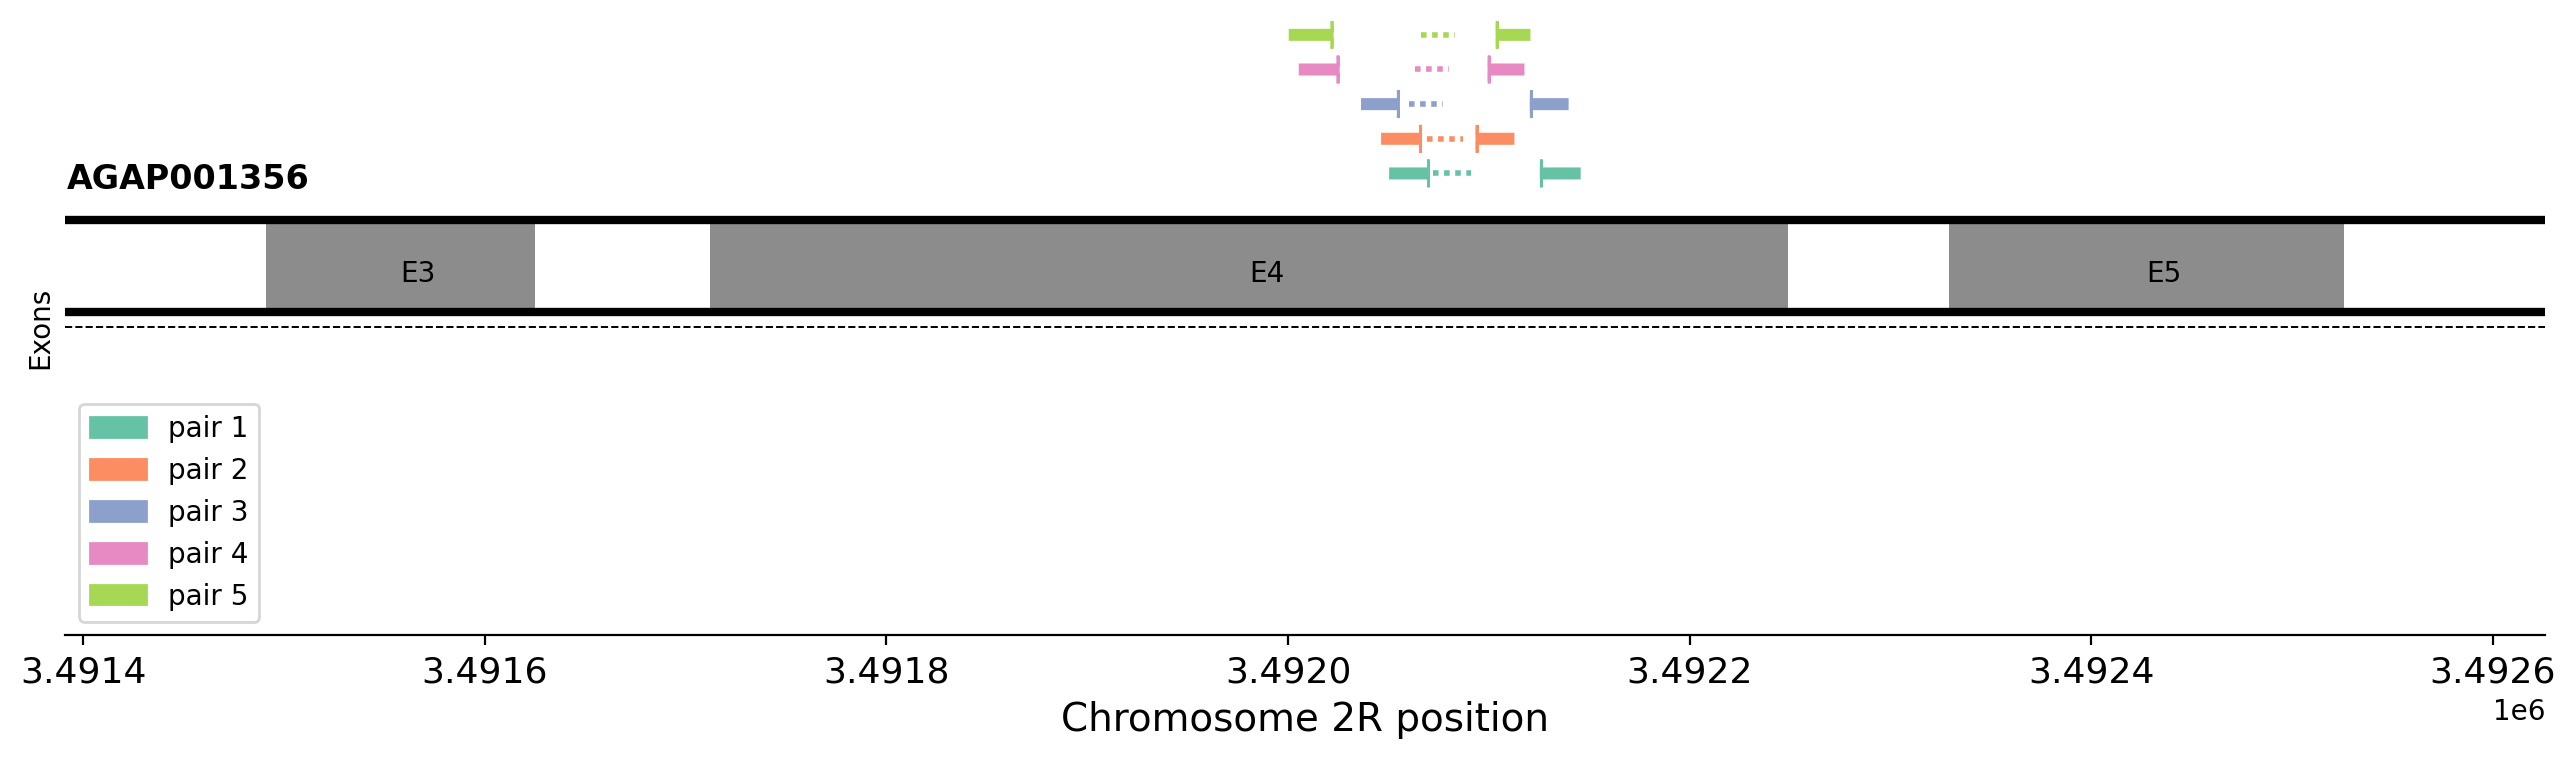

In [16]:
primers.plot_primer_locs(
    legend_loc='lower left',
    out_dir=".",
)

### Checking our primers for specificity to the *Anopheles gambiae* genome

We can use a cool new python package, [gget](https://github.com/pachterlab/gget), to rapidly search our primers against the AgamP3 genome, to ensure they will not amplify any other regions of the genome. gget rapidly queries large databases - in this case we can use the program BLAT to align primer sequences. Unfortunately as the lengths of primer sequences are so short, it is at the limit of BLATs sensitivity, and in some cases, matches are not returned. gget can also currently only query the older AgamP3 assembly, and not *An. funestus*. Therefore, it is also recommended run a more exhaustive search in [Primer-BLAST](https://www.ncbi.nlm.nih.gov/tools/primer-blast/).

In [17]:
blat_result_df = primers.gget_blat_genome(
    assembly='anoGam3'
)

blat_result_df

Tue Oct 15 19:20:24 2024 INFO No DNA BLAT matches were found for this sequence in genome anoGam3.


No hit for forward - pair 3


Tue Oct 15 19:20:28 2024 INFO No DNA BLAT matches were found for this sequence in genome anoGam3.


No hit for probe - pair 4


Tue Oct 15 19:20:30 2024 ERROR 
            BLAT of seqtype 'DNA' using assembly 'anoGam3' was unsuccesful. 
            Possible causes: 
            - Sequence possibly too short (required minimum: 20 characters). 
            - Assembly possibly invalid. All available species with their respective assemblies are listed at https://genome.ucsc.edu/cgi-bin/hgBlat.
            


No hit for reverse - pair 5


genome  query_size  aligned_start  aligned_end  matches  \
  primer                                                                
1 forward_1  anoGam3          20              1           20       20   
  reverse_1  anoGam3          20              1           20       20   
  probe_1    anoGam3          20              1           20       20   
2 forward_2  anoGam3          20              1           20       20   
  reverse_2  anoGam3          19              1           19       19   
  probe_2    anoGam3          19              1           19       19   
3 reverse_3  anoGam3          19              1           19       19   
  probe_3    anoGam3          18              1           18       18   
4 forward_4  anoGam3          20              1           20       20   
  reverse_4  anoGam3          18              1           18       18   
5 forward_5  anoGam3          22              1           22       22   
  probe_5    anoGam3          18              1           18       18   

             mismatches  %_aligned  %_matched chromosome strand    start  \
  primer                                                                   
1 forward_1           0      100.0      100.0      chr2R      +  3492051   
  reverse_1           0      100.0      100.0      chr2R      -  3492126   
  probe_1             0      100.0      100.0      chr2R      +  3492072   
2 forward_2           0      100.0      100.0      chr2R      +  3492047   
  reverse_2           0      100.0      100.0      chr2R      -  3492094   
  probe_2             0      100.0      100.0      chr2R      +  3492069   
3 reverse_3           0      100.0      100.0      chr2R      -  3492121   
  probe_3             0      100.0      100.0      chr2R      +  3492060   
4 forward_4           0      100.0      100.0      chr2R      +  3492006   
  reverse_4           0      100.0      100.0      chr2R      -  3492100   
5 forward_5           0      100.0      100.0      chr2R      +  3492001   
  probe_5             0      100.0      100.0      chr2R      +  3492066   

                 end  
  primer              
1 forward_1  3492070  
  reverse_1  3492145  
  probe_1    3492091  
2 forward_2  3492066  
  reverse_2  3492112  
  probe_2    3492087  
3 reverse_3  3492139  
  probe_3    3492077  
4 forward_4  3492025  
  reverse_4  3492117  
5 forward_5  3492022  
  probe_5    3492083

### Further considerations

We may now have designed suitable primers. However, there are some further considerations...

- Primers should be run in [**Primer-BLAST**](https://www.ncbi.nlm.nih.gov/tools/primer-blast/), to ensure specificity against the host organism, and specificity for the genomic location of interest.

- If in multiplexed use with other primers or probes, primers must not interact with each other. This can be investigated on a one by one basis using the IDT tool [oligoanalyzer](https://eu.idtdna.com/calc/analyzer), though higher throughput algorithms may be required.

- If designing TaqMan or Locked Nucleic Acid (LNA) probes for SNP detection, further modification will be required, such as adding fluorophores and ensuring the two probes (one for wild-type, one for mutant) can discriminate between SNPs. for LNA probes, you will want to play around with the placement of LNAs in the oligo sequence, which can allow short probes (~10-14 bases) to bind with high affinity and discriminate between SNPs. IDT have a tool for this which allow you to check the binding affinity between mismatches, though it requires a log in https://eu.idtdna.com/calc/analyzer/lna. 

- Many more considerations.... [IDT - How to design primers and probes for PCR and qPCR](https://eu.idtdna.com/pages/education/decoded/article/designing-pcr-primers-and-probes)   


## Worked example: Primers to avoid

In the above *ace1* example, all of the primer pairs look reasonable. Lets have a look at an example where some of the primers do not look so good. A UGT detoxification gene, AGAP006222, is overexpressed very highly in populations of *An. coluzzii* - lets try and design some qPCR primers to measure its expression. The below `AnoPrimer.designPrimers()` function integrates the entire notebook into one function, for convenience.

Our genome sequence for 2L is 49364325 bp long


Exon junctions for AGAP006222-RA: [ 238  325  911 1353] [28524463, 28524621, 28525282, 28525790] 

Subsetting allele frequencies to taxon == 'coluzzii'


Tue Oct 15 19:25:20 2024 INFO No DNA BLAT matches were found for this sequence in genome anoGam3.


No hit for reverse - pair 2


Tue Oct 15 19:25:21 2024 INFO No DNA BLAT matches were found for this sequence in genome anoGam3.


No hit for forward - pair 3


Tue Oct 15 19:25:23 2024 INFO No DNA BLAT matches were found for this sequence in genome anoGam3.


No hit for forward - pair 4


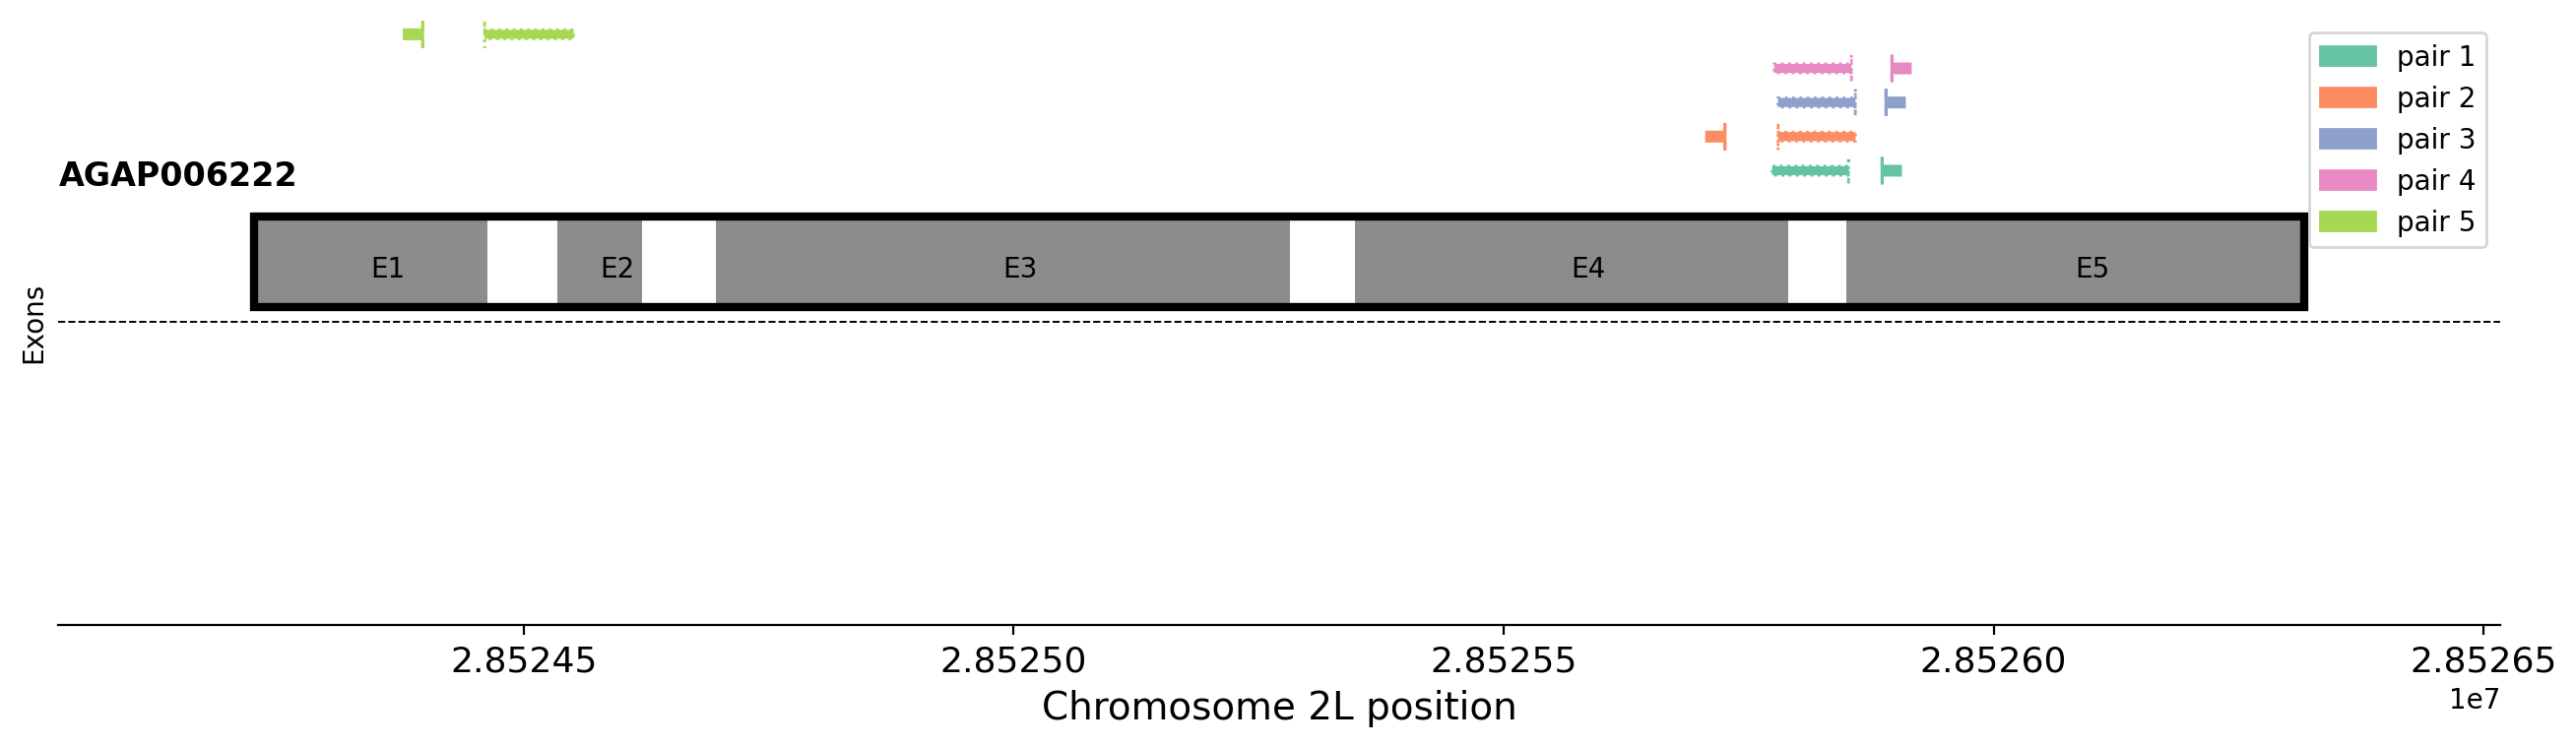

In [18]:
primer_parameters  =  {
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_TASK':'generic',
    'PRIMER_MIN_SIZE': 17,
    'PRIMER_MAX_SIZE': 24,
    'PRIMER_OPT_TM': 60.0,
    'PRIMER_MIN_TM': 55.0,
    'PRIMER_MAX_TM': 64.0,
    'PRIMER_MIN_GC': 30.0,
    'PRIMER_MAX_GC': 70.0,
    'PRIMER_MIN_THREE_PRIME_DISTANCE': 3,  # this parameter is the minimum distance between successive pairs. If 1, it means successive primer pairs could be identical bar one base shift
    'PRIMER_INTERNAL_OPT_SIZE': 16,  # Probe size preferences if selected, otherwise ignored
    'PRIMER_INTERNAL_MIN_SIZE': 10,
    'PRIMER_INTERNAL_MAX_SIZE': 22,
    'PRIMER_INTERNAL_MIN_TM': 45,
    'PRIMER_INTERNAL_MAX_TM': 65,  # Probe considerations are quite relaxed, assumed that LNAs / Taqman will be used later to affect TM
    # Extra primer3 parameters can go here
    # In the same format as above
    }

bad_primers = AnoPrimer.design_primers(
    species='gambiae_sl',
    assay_type='cDNA primers',  # assay_type options are: 'cDNA primers', 'gDNA primers', 'gDNA primers + probe', 'probe'
    target='AGAP006222-RA',  # target should be an AGAP transcript identifier in for cDNA, otherwise should be an integer in genome
    assay_name='UGT_222',
    n_primer_pairs=5,
    min_amplicon_size=60,
    max_amplicon_size=120,
    primer_parameters=primer_parameters,
)

bad_primers.evaluate_primers(    
    sample_sets='AG1000G-GH',          # sample_set = '3.0' .you can also supply lists with multiple sample sets e.g ['AG1000G-GH', 'AG1000G-CI', 'AG1000G-BF-A']
    sample_query="taxon == 'coluzzii'",
    out_dir="."
    )

We can see that only primer pair 4 really looks suitable, as all the other primer pairs contain SNPs at their 3' end in at least one of the forward or reverse primers.

## Well done!!

Well done on completing the notebook and designing sets of SNP-variation informed primers!

## Exercises

### English

For the exercises, you can either re-run this notebook or use the function in the cell above, which integrates the above notebook into one single function, for convenience.

1. Design a set of qPCR primers to measure gene expression of the carboxylesterase gene, COEAE2F (contig='2L', transcript='AGAP006228-RA'), restricting the samples to just *Anopheles gambiae*. HINT: use 'cDNA primers'.

2. Design a set of primers and a probe for the *vgsc*-995F *kdr* mutation (contig = 2L, genome bp = 2422652)

3. Design a set of qPCR primers to target the gene from module 3's practical exercise. 

### Français

En tant qu'exercices, vous pouvez soit exécuter à nouveau ce notebook ou utiliser la fonction de la cellule ci-dessus, qui intègre le contenu du reste du notebook dans une seule cellule, pour une plus grande aisance.

1. Créer un ensemble d'amorces pour qPCR afin de mesurer l'expression génique du gène carboxylesterase COEAE2F (contig='2L', transcript='AGAP006228-RA'), en limitant les échantillons aux Anopheles gambiae. INDICE: utiliser 'cDNA primers'.

2. Créer un ensemble d'amorces et une sonde pour la mutation vgsc-995F kdr (contig = 2L, genome bp = 2422652)

3. Créer un ensemble d'amorces pour qPCR ciblant le gène de l'exercice pratique du module 3


In [23]:
primer_parameters  =  {
    'PRIMER_OPT_SIZE': 20,
    'PRIMER_TASK':'generic',
    'PRIMER_MIN_SIZE': 17,
    'PRIMER_MAX_SIZE': 24,
    'PRIMER_OPT_TM': 60.0,
    'PRIMER_MIN_TM': 55.0,
    'PRIMER_MAX_TM': 64.0,
    'PRIMER_MIN_GC': 30.0,
    'PRIMER_MAX_GC': 75.0,
    'PRIMER_MIN_THREE_PRIME_DISTANCE': 3,  # this parameter is the minimum distance between successive pairs. If 1, it means successive primer pairs could be identical bar one base shift
    'PRIMER_INTERNAL_OPT_SIZE': 16,  # Probe size preferences if selected, otherwise ignored
    'PRIMER_INTERNAL_MIN_SIZE': 10,
    'PRIMER_INTERNAL_MAX_SIZE': 22,
    'PRIMER_INTERNAL_MIN_TM': 45,
    'PRIMER_INTERNAL_MAX_TM': 65,  # Probe considerations are quite relaxed, assumed that LNAs / Taqman will be used later to affect TM
    # Extra primer3 parameters can go here
    # In the same format as above                       
    }


# coe_primers= AnoPrimer.design_primers(
#      species='gambiae_sl',
#      assay_type='cDNA primers',  # assay_type options are: 'cDNA primers', 'gDNA primers', 'gDNA primers + probe', 'probe'
#      target='AGAP000818-RA',            # target should be an AGAP transcript identifier in for cDNA primers, otherwise should be an integer in genome
#      assay_name='COEAE2F',
#      n_primer_pairs=8,
#      min_amplicon_size=60,
#      max_amplicon_size=120,
#      primer_parameters=primer_parameters,
# )
#
# coe_primers.evaluate_primers(
#      sample_sets=['AG1000G-BF-A', 'AG1000G-GH', 'AG1000G-GN-A'], 
#      out_dir="."
# )

## Future development

Any contributions or suggestions on how we can improve this notebook are more than welcome. Please [email](mailto:sanjay.nagi@lstmed.ac.uk) or log an [issue on github](https://github.com/sanjaynagi/primerDesignAg/issues). This notebook and source code for AnoPrimer are located here - https://github.com/sanjaynagi/AnoPrimer/    

## References


[1] Santolamazza, F., Mancini, E., Simard, F. et al. **Insertion polymorphisms of SINE200 retrotransposons within speciation islands of Anopheles gambiae molecular forms**. Malar J 7, 163 (2008). https://doi.org/10.1186/1475-2875-7-163

[2] White BJ, Santolamazza F, Kamau L, Pombi M, Grushko O, Mouline K, Brengues C, Guelbeogo W, Coulibaly M, Kayondo JK, Sharakhov I, Simard F, Petrarca V, Della Torre A, Besansky NJ. **Molecular karyotyping of the 2La inversion in Anopheles gambiae**. Am J Trop Med Hyg. 2007 Feb;76(2):334-9. PMID: 17297045.

[3] Makunin, A., Korlević, P., Park, N., Goodwin, S., Waterhouse, R. M., von Wyschetzki, K., Jacob, C. G., Davies, R., Kwiatkowski, D., St Laurent, B., Ayala, D., & Lawniczak, M. K. N. (2022). **A targeted amplicon sequencing panel to simultaneously identify mosquito species and Plasmodium presence across the entire Anopheles genus**. Molecular Ecology Resources, 22, 28– 44. https://doi.org/10.1111/1755-0998.13436

[4] Chabi J, Van’t Hof A, N’dri LK, Datsomor A, Okyere D, Njoroge H, et al. (2019) **Rapid high throughput SYBR green assay for identifying the malaria vectors Anopheles arabiensis, Anopheles coluzzii and Anopheles gambiae s.s**. Giles. PLoS ONE 14(4)

[5] Lynd, A., Oruni, A., van’t Hof, A.E. et al. **Insecticide resistance in Anopheles gambiae from the northern Democratic Republic of Congo, with extreme knockdown resistance (kdr) mutation frequencies revealed by a new diagnostic assay**. Malar J 17, 412 (2018). https://doi.org/10.1186/s12936-018-2561-5

[6] Lefever S, Pattyn F, et al. (2013) **Single-nucleotide polymorphisms and other mismatches reduce performance of quantitative PCR assays. Single-nucleotide polymorphisms and other mismatches reduce performance of quantitative PCR assays**. Clin Chem, 59(10):1470–1480.


[7] Owczarzy R, Tataurov AV, et al. (2008) **IDT SciTools: a suite for analysis and design of nucleic acid oligomers**. Nucl Acids Res, 36 (suppl 2):W163–169.

[8] The Anopheles gambiae 1000 Genomes Consortium (2020). **Genome variation and population structure among 1142 mosquitoes of the African malaria vector species *Anopheles gambiae* and *Anopheles coluzzii***. *Genome Research*, **30**: 1533-1546. 
https://genome.cshlp.org/content/early/2020/09/25/gr.262790.120

[9] Untergasser A, Cutcutache I, Koressaar T, Ye J, Faircloth BC, Remm M and Rozen SG (2012). **Primer3--new capabilities and interfaces**. *Nucleic Acids Research*. 40(15):e115.

[10] Ye, J., Coulouris, G., Zaretskaya, I. et al. **Primer-BLAST: A tool to design target-specific primers for polymerase chain reaction**. BMC Bioinformatics 13, 134 (2012). https://doi.org/10.1186/1471-2105-13-134

[11] Grau-Bové X, Lucas E, Pipini D, Rippon E, van ‘t Hof AE, Constant E, et al. (2021) **Resistance to pirimiphos-methyl in West African Anopheles is spreading via duplication and introgression of the Ace1 locus**. PLoS Genet 17(1): e1009253. https://doi.org/10.1371/journal.pgen.1009253